# Step 1: Upload the CSV File
First, upload your CSV file in Google Colab using files.upload(). This allows you to load the file into a DataFrame.

In [1]:
import pandas as pd

## This imports the Pandas library, which is essential for data manipulation and analysis in Python.
## Here, `pd` is an alias that allows for shorthand references to Pandas functions.


from google.colab import files

## This line imports the `files` module from `google.colab`, which provides tools for handling
## file operations in Google Colab, such as uploading files.



In [2]:
# Upload the CSV file
uploaded = files.upload()

## This initiates a file upload dialog in Google Colab.
## When we uploads a file, it is stored in the uploaded dictionary, where the
## keys are the file names and the values are the file contents in bytes.



# Load the uploaded file into a DataFrame
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
data = pd.read_csv(file_name)

## The `file_name` line retrieves the file name of the uploaded file from the dictionary.
## Then, `pd.read_csv(file_name)` reads the CSV file into a Pandas DataFrame called `data`, which is a
## table-like data structure where each column represents a variable, and each row represents an observation.



print("Data Loaded Successfully")
data.head()

## `print("Data Loaded Successfully")` confirms that the file has been loaded without errors.
## `data.head()` displays the first few rows of the DataFrame, allowing us to check if the data has loaded correctly.


Saving Book2.csv to Book2.csv
Data Loaded Successfully


,Line_ID,Experiment,REP,RLN_count,%
0,RIL-2,Y1,R1,NaN,NaN
1,RIL-2,Y1,R2,NaN,NaN
2,RIL-2,Y1,R3,NaN,NaN
3,RIL-2,Y1,R4,NaN,NaN
4,RIL-2,Y1,R5,NaN,NaN


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('REP').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Step 2: Data Preparation

Now, let's preprocess the data:
Convert the % column to numeric and scale it by 100. Also, Define categories for percentage ranges.

In [3]:
# Calculate the average RLN_count for each Line_ID and Experiment, ignoring missing values
data = data.groupby(['Line_ID', 'Experiment'])['%'].mean().reset_index()

## `data.groupby(['Line_ID', 'Experiment'])`: Groups the data by the unique combinations of Line_ID and Experiment.
## This means that calculations (such as taking an average) will be done for each Line_ID within each Experiment.

## `['%'].mean()`: This part selects the % column and calculates the mean for each group formed by Line_ID and Experiment.
## Missing values (NaN) are automatically ignored in the calculation.
## `.reset_index()`: Resets the index to make sure the result is a clean DataFrame with the default integer index.
## This step is optional but helpful, especially if we plan to work with the grouped data as a standalone DataFrame.



# Display the result
print(data)

## `print(data)`: Displays the resulting DataFrame in the console.
## This allows us to verify that the average values were calculated correctly.


              Line_ID Experiment         %
0           AUS28451R         Y1  0.089363
1           AUS28451R         Y2  0.082444
2              Alpowa         Y1  1.000000
3              Alpowa         Y2  1.000000
4              RIL-10         Y1  0.586393
..                ...        ...       ...
297     UnplantedInoc         Y2  0.000000
298  UnplantedNonInoc         Y1  0.000000
299  UnplantedNonInoc         Y2  0.000000
300      VillaxStJose         Y1  0.291307
301      VillaxStJose         Y2  0.307764

[302 rows x 3 columns]


In [4]:
# Check basic statistics of the % column to understand the distribution
print(data['%'].describe())


## `data['%']`: This accesses the % column within the data DataFrame. After grouping and averaging,
## this column should contain the mean values calculated for each Line_ID and Experiment combination.

## `.describe()`: This function provides key summary statistics for the % column, helping us understand its distribution.
## Specifically, it outputs:
## count: The number of non-missing values in the column.
## mean: The average of all values.
## std: The standard deviation, measuring how spread out the values are from the mean.
## min and max: The minimum and maximum values, showing the range.
## 25%, 50% (median), and 75%: These are the quartiles, indicating the distribution's spread and the central tendency of the values.



count    221.000000
mean       0.447821
std        0.274575
min        0.000000
25%        0.216523
50%        0.456263
75%        0.623364
max        1.967461
Name: %, dtype: float64


In [5]:
# Step 2: Data Preparation
import numpy as np

## Imports the NumPy library, which provides support for numerical operations and is
## used here to set the `np.inf` (infinity) value in bins.



# Convert the '%' column to numeric, treating non-numeric values (including empty cells) as NaN
data['%'] = pd.to_numeric(data['%'], errors='coerce') * 100

## `pd.to_numeric(data['%'], errors='coerce')`: Converts the % column to a numeric data type.
## If any cell contains non-numeric data or is empty, it’s converted to NaN.

## `* 100`: This multiplies each value by 100, which may be necessary if the % values
## were initially expressed in a decimal format (e.g., 0.25 as 25%).


# Define bins to classify into the desired four categories
bins = [0, 25, 50, 75, float('inf')]
labels = ['<=25%', '>25-50%', '>50-75%', '>75%']


## bins = [0, 25, 50, 75, float('inf')]: This creates fixed boundaries:
## 0 to 25: for values up to and including 25%.
## >25 to 50: for values greater than 25% up to 50%.
## >50 to 75: for values greater than 50% up to 75%.
## >75 to ∞: for values greater than 75%, capturing all higher values, even if they exceed 100.

## labels = ['<=25%', '>25-50%', '>50-75%', '>75%']: Assigns readable labels for each range.



# Create a new column categorizing the '%' values into these bins
data['Percentage_Category'] = pd.cut(data['%'], bins=bins, labels=labels, include_lowest=True)

## pd.cut(...): Categorizes the % values into the defined bins and labels.
## The pd.cut() function will categorize each row based on these ranges, with anything
## over 75% falling into the '>75%' category. This ensures that extreme values (e.g., 150, 200)
## will be appropriately categorized in the '>75%' bin.


## `include_lowest=True`: Ensures that the lowest value in the dataset is included in the first bin.



In [6]:
# Check the distribution of the categories
print(data['Percentage_Category'].value_counts())

## `data['Percentage_Category'].value_counts()`: This function counts the occurrences of each category
## within the Percentage_Category column. It provides a summary of how many rows fall into each category,
## giving insight into the distribution of our data across the four defined bins:

## '<=25%', '>25-50%', '>50-75%', and '>75%'

## print(...): This outputs the result, showing the count of entries in each category.

Percentage_Category
>25-50%    66
>50-75%    66
<=25%      60
>75%       29
Name: count, dtype: int64


# Step 3: Set Up Interactive Widgets

Using `ipywidgets`, we can create controls for selecting experiments and customizing the chart title.

In [7]:
import ipywidgets as widgets
from IPython.display import display

## `ipywidgets` allows us to create interactive elements like dropdowns and text boxes
## within Jupyter notebooks. `display` is used to show these widgets in the notebook.



# Create dropdown widget for selecting experiment categories
experiment_options = data['Experiment'].unique().tolist()

## `data['Experiment'].unique().tolist()`: Extracts unique values from the Experiment column to create
## a list of all distinct experiments. This list will be used as options for the selection widget.


experiment_select = widgets.SelectMultiple(
    options=experiment_options,
    value=experiment_options,  # Default to all experiments selected
    description='Experiments'
)

## `SelectMultiple`: Creates a dropdown that allows multiple selections.
## `options=experiment_options`: Populates the dropdown with experiment categories.
## `value=experiment_options`: Sets all experiments as the default selection.
## `description='Experiments'`: Provides a label to indicate what the widget represents.

# Widget for customizing the chart title
title_widget = widgets.Text(value="", description="Chart Title:")

## `Text`: Creates a text input box to set a custom chart title.
## `value`="": Initializes with an empty string.
## `description`="Chart Title:": Provides a label for the title input.

# Widgets for editing legend names
legend_label_1 = widgets.Text(value="Experiment-2", description="Legend for Y1:")
legend_label_2 = widgets.Text(value="Experiment-3", description="Legend for Y2:")

## `legend_label_1` and `legend_label_2`: Create text boxes to customize legend names for specific experiments (e.g., "Y1" and "Y2").
## These are pre-filled with default names ("Experiment-2" and "Experiment-3"), but we can type over them to set custom labels.

# Display the widgets
display(experiment_select, title_widget, legend_label_1, legend_label_2)
## display(...): Renders the widgets so we can interact with them directly within the notebook.


SelectMultiple(description='Experiments', index=(0, 1), options=('Y1', 'Y2'), value=('Y1', 'Y2'))

Text(value='', description='Chart Title:')

Text(value='Experiment-2', description='Legend for Y1:')

Text(value='Experiment-3', description='Legend for Y2:')

# Step 4: Define the Plotting Function

This function will generate a bar chart based on the selected experiments and update it dynamically.

In [8]:
import matplotlib.pyplot as plt

## Imports Matplotlib for plotting

# Function to generate and display the plot
def generate_plot(change=None):

## Defines a function, generate_plot, that will create a bar plot based on the selected options
## in the widgets. change=None is added so this function can accept changes from the widget observers.

    # Filter data based on selected experiments
    filtered_data = data[data['Experiment'].isin(experiment_select.value)]

    ## Filters the data DataFrame to only include rows where the Experiment column matches
    ## the selected values from `experiment_select.value` (the experiments chosen in the widget)




    # Count the number of unique Line_IDs for each selected Experiment and Percentage_Category
    category_counts = filtered_data.groupby(['Experiment', 'Percentage_Category'])['Line_ID'].nunique().unstack(fill_value=0)


    ## Groups the filtered data by Experiment and Percentage_Category, counting the unique Line_IDs within
    ## each combination. This result, category_counts, will be a table where each row represents an experiment,
    ## and each column represents a percentage category. `unstack(fill_value=0)`: Converts the grouped data
    ## into a more readable format with columns representing percentage categories and fills missing values with zero.


    # Plot the categorized data with the percentage categories on the x-axis
    fig, ax = plt.subplots(figsize=(8, 6))
    category_counts.T.plot(kind='bar', ax=ax)  # Transpose to get categories on x-axis

    ## Sets up a plot and transposes category_counts to ensure the percentage categories are on the x-axis.
    ## The plot(kind='bar') creates a bar chart.

    # Customize the chart
    ax.set_xlabel('Percentage Category')
    ax.set_ylabel('Number of Lines')
    ax.set_title(title_widget.value)

    ## Sets labels and title using the value from the title_widget.



    # Make x-axis labels parallel to the axis
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    ## Rotates x-axis labels to make them horizontal, improving readability.


    # Use custom legend names from widgets
    plt.legend([legend_label_1.value, legend_label_2.value], title="", loc="upper right")
    plt.show()



    ## Sets the legend to use custom names from legend_label_1 and legend_label_2.
    ## loc="upper right" positions the legend.



# Link widgets to the plotting function to update plot on change
experiment_select.observe(generate_plot, names='value')
title_widget.observe(generate_plot, names='value')
legend_label_1.observe(generate_plot, names='value')
legend_label_2.observe(generate_plot, names='value')

## Uses .observe() to update the plot dynamically whenever a widget value changes.



# Step 5: Link Widgets to the Plotting Function

Set up the widgets to trigger generate_plot whenever their values change.

<ipython-input-8-97335ae7e695>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_counts = filtered_data.groupby(['Experiment', 'Percentage_Category'])['Line_ID'].nunique().unstack(fill_value=0)


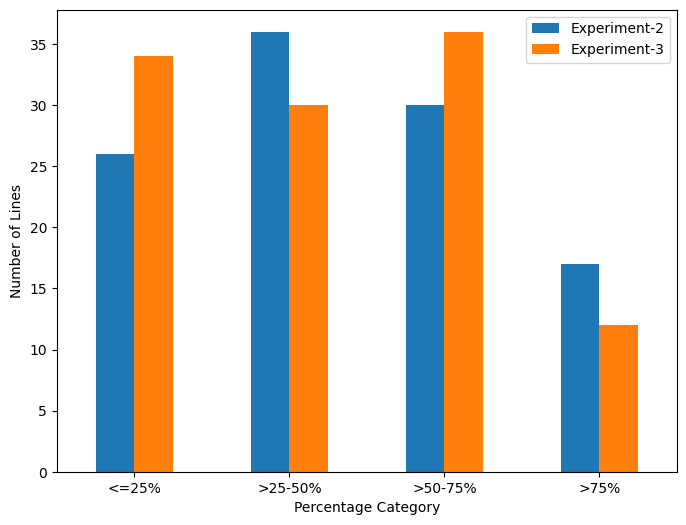

In [9]:
# Set up the plot to update when the experiment selection or title changes
experiment_select.observe(generate_plot, names='value')
title_widget.observe(generate_plot, names='value')


## experiment_select.observe(generate_plot, names='value'): Adds an observer to the experiment_select
## widget so that any change in experiment selection will trigger the generate_plot function,
## updating the plot based on the selected experiments. `title_widget.observe(generate_plot, names='value')`: Adds
## an observer to the title_widget to update the plot's title whenever the title text changes.



# Generate the initial plot
generate_plot()

## This line calls generate_plot() once initially, generating the plot with the default widget values when the code first runs.